In [0]:
import pandas as pd
data = pd.read_csv('/content/drive/My Drive/Reviews.csv')

In [6]:
data.shape

(568454, 10)

In [0]:
data=data[:10000]

In [8]:
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [0]:
input_text = data['Text'].tolist()

In [0]:
output_text = data['Summary'].tolist()

In [11]:
len(input_text),len(output_text)

(10000, 10000)

# PREPROCESSING


1.   lowercase
2.   removing html tags
3.   removing appostrophe
4.   's removing
5.   removing any text hide in () paranthesis

6.   removing punctuation and special characters
7.   removing stopwords
8.   remove short words 



In [0]:
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",

                           "didn't": "did not", "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",

                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",

                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",

                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",

                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",

                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",

                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",

                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",

                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",

                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",

                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",

                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",

                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",

                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",

                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",

                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",

                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",

                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",

                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",

                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",

                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",

                           "you're": "you are", "you've": "you have"}

In [13]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:
stopwords = set(stopwords.words('english'))

In [0]:
from bs4 import BeautifulSoup
import re
def text_cleaner(text):
  new_text = text.lower()
  new_text = BeautifulSoup(new_text,'lxml').text
  new_text = re.sub(r'\([^)]*\)','',text)
  new_text = re.sub('"','',text)
  new_text = ','.join([contraction_mapping[t] if t in contraction_mapping else t for t in new_text.split(" ")])
  new_text = re.sub(r"'s\b","",new_text)
  new_text = re.sub("[^a-zA-Z]", " ", new_text)
  tokens = [w for w in new_text.split() if not w in stopwords]
  long_words=[]
  for i in tokens:
      if len(i)>=3:                  #removing short word
          long_words.append(i)   
  return (" ".join(long_words)).strip() 



In [0]:
cleaned_text = []
for text in input_text:
  t = text_cleaner(text)
  cleaned_text.append(t)

In [0]:
def summary_cleaner(text):
    newString = re.sub('"','', text)
    newString = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in newString.split(" ")])    
    newString = re.sub(r"'s\b","",newString)
    newString = re.sub("[^a-zA-Z]", " ", newString)
    newString = newString.lower()
    tokens=newString.split()
    newString=''
    for i in tokens:
        if len(i)>1:                                 
            newString=newString+i+' '  
    return newString

In [0]:
cleaned_output = []
for text in output_text:
  t = summary_cleaner(text)
  cleaned_output.append(t)

In [0]:
 import matplotlib.pyplot as plt
 text_word_count = []
 summary_word_count = []
 

 for i in cleaned_text:
   text_word_count.append(len(i.split()))

In [0]:
for i in cleaned_output:
  summary_word_count.append(len(i.split()))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f547d32fa90>,
      dtype=object)

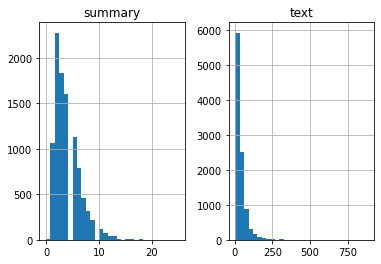

In [21]:
length_df = pd.DataFrame({'text':text_word_count,'summary':summary_word_count})
length_df.hist(bins=30)

In [0]:
target_text = []
target_input_text =[]
for text in cleaned_output:
  t1= text + ' <END> '
  t2 = '<START> ' + text
  target_text.append(t1)
  target_input_text.append(t2)


In [23]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

Using TensorFlow backend.


In [0]:
text_tokenizer = Tokenizer()
text_tokenizer.fit_on_texts(cleaned_text)
input_seq = text_tokenizer.texts_to_sequences(cleaned_text)

In [0]:

padded_input = pad_sequences(input_seq,padding = 'post',maxlen=80)

In [0]:
sum_tokenizer=Tokenizer(filters='')
sum_tokenizer.fit_on_texts(target_text + target_input_text)
target_seq = sum_tokenizer.texts_to_sequences(target_text)
target_input_seq = sum_tokenizer.texts_to_sequences(target_input_text)


In [0]:
padded_target = pad_sequences(target_seq,padding='post',maxlen=10)
padded_input_target = pad_sequences(target_input_seq,padding='post',maxlen=10)

In [28]:
!wget http://nlp.stanford.edu/data/glove.6B.zip


--2020-03-30 13:14:42--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2020-03-30 13:14:42--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2020-03-30 13:14:42--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip.2’

glove

In [29]:
!unzip glove*.zip

Archive:  glove.6B.zip
replace glove.6B.50d.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [75]:
print('indexing word vectors')
import numpy as np
embedding_index = {}
f = open('/content/glove.6B.300d.txt',encoding='utf-8')
for line in f:
  values = line.split()
  word = values[0]
  coeff= np.asarray(values[1:],dtype='float32')
  embedding_index[word]=coeff
  

indexing word vectors


In [0]:
num_words_input = len(text_tokenizer.word_index) + 1
word2index_input = text_tokenizer.word_index
embedding_matrix = np.zeros((num_words_input,300))
for word, i in word2index_input.items():
  if i < num_words_input:
      embedding_vector=embedding_index.get(word)
  if embedding_vector is not None:
      embedding_matrix[i]=embedding_vector


In [0]:
from tensorflow.keras.layers import Dense, Embedding,LSTM,Bidirectional,Input
embed_layer =Embedding(num_words_input,300,weights=[embedding_matrix], input_length=80, name ='embedindg_layer')


In [0]:
lstm1 = LSTM(300,return_sequences=True, name='lstm1')
lstm2=LSTM(300,return_state=True, name = 'lstm_input2')
encoder_input = Input(shape=(80,),name='input_layer1')
encoder_input1 = embed_layer(encoder_input)


In [0]:
encoder_output1=lstm1(encoder_input1)
encoder_output,state_h,state_c=lstm2(encoder_output1)



In [0]:
encoder_states=[state_h,state_c]

In [0]:
vocab_output = len(sum_tokenizer.word_index) + 1


In [0]:
decoder_inputs= Input(shape=(10,), name = 'input_layer2')

output_embedding = Embedding(vocab_output,300,input_length=10)
decoder_lstm1=LSTM(300,return_sequences = True, name = 'lstm2')
decoder_lstm2=LSTM(300,return_sequences=True,return_state=True, name = 'lstm2_output')

In [0]:
decoder_input1 = output_embedding(decoder_inputs)
decoder_output1 = decoder_lstm1(decoder_input1)
decoder_output,_,_ = decoder_lstm2(decoder_input1,initial_state=encoder_states)

In [0]:
from tensorflow.keras.layers import TimeDistributed
decoder_dense  = TimeDistributed(Dense(vocab_output, activation = 'softmax'))
decoder_outputs = decoder_dense(decoder_output)

In [0]:

from tensorflow.keras.models import Model
model = Model([encoder_input,decoder_inputs],decoder_outputs)

In [0]:
decoder_target_one_hot=np.zeros((len(cleaned_text),10,vocab_output),dtype='float32')
for i,d in enumerate(padded_target):
    for t, word in enumerate(d):
        decoder_target_one_hot[i,t,word]=1

In [0]:
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [89]:
model.fit([padded_input,padded_input_target],decoder_target_one_hot,epochs=100,batch_size=32,validation_split = 0.3)

Epoch 1/100
219/219 [==============================] - 15s 68ms/step - loss: 2.9007 - accuracy: 0.6061 - val_loss: 2.6705 - val_accuracy: 0.6349
Epoch 2/100
219/219 [==============================] - 13s 59ms/step - loss: 2.5840 - accuracy: 0.6305 - val_loss: 2.6337 - val_accuracy: 0.6384
Epoch 3/100
219/219 [==============================] - 13s 60ms/step - loss: 2.5043 - accuracy: 0.6349 - val_loss: 2.5950 - val_accuracy: 0.6426
Epoch 4/100
219/219 [==============================] - 13s 60ms/step - loss: 2.4309 - accuracy: 0.6399 - val_loss: 2.5775 - val_accuracy: 0.6449
Epoch 5/100
219/219 [==============================] - 13s 59ms/step - loss: 2.3617 - accuracy: 0.6445 - val_loss: 2.5542 - val_accuracy: 0.6481
Epoch 6/100
219/219 [==============================] - 13s 60ms/step - loss: 2.2986 - accuracy: 0.6496 - val_loss: 2.5278 - val_accuracy: 0.6517
Epoch 7/100
219/219 [==============================] - 13s 58ms/step - loss: 2.2391 - accuracy: 0.6541 - val_loss: 2.5244 - val_ac

KeyboardInterrupt: ignored

In [0]:
encoder_model =Model(encoder_input,encoder_states)


In [0]:
decoder_state_input_h = Input(shape=(100,))
decoder_state_input_c= Input(shape=(100,))
decoder_state_input = [decoder_state_input_h,decoder_state_input_c]


In [0]:
decoder_input_single = Input(shape=(1,))
decoder_input_single_x = output_embedding(decoder_input_single)


In [0]:
decoder_output,h,c=decoder_lstm(decoder_input_single_x,initial_state=decoder_state_input)

In [0]:
decoder_states = [h,c]
decoder_model =Model([decoder_input_single]+decoder_state_input,[decoder_output]+decoder_states)


In [0]:
word2index_input = text_tokenizer.word_index
word2index_output = sum_tokenizer.word_index
idx2word_text = {v:k for k,v in word2index_input.items()}
idx2word_sum = {v:k for k,v in word2index_output.items()}

In [57]:
word2index_output


{'<end>': 1,
 '<start>': 2,
 'great': 3,
 'good': 4,
 'the': 5,
 'not': 6,
 'for': 7,
 'best': 8,
 'and': 9,
 'coffee': 10,
 'it': 11,
 'my': 12,
 'but': 13,
 'love': 14,
 'of': 15,
 'is': 16,
 'to': 17,
 'this': 18,
 'product': 19,
 'taste': 20,
 'delicious': 21,
 'very': 22,
 'in': 23,
 'flavor': 24,
 'tea': 25,
 'food': 26,
 'excellent': 27,
 'yummy': 28,
 'like': 29,
 'tasty': 30,
 'dog': 31,
 'you': 32,
 'too': 33,
 'favorite': 34,
 'as': 35,
 'price': 36,
 'chips': 37,
 'these': 38,
 'ever': 39,
 'so': 40,
 'with': 41,
 'hot': 42,
 'are': 43,
 'cup': 44,
 'just': 45,
 'have': 46,
 'on': 47,
 'better': 48,
 'free': 49,
 'stuff': 50,
 'chocolate': 51,
 'no': 52,
 'sweet': 53,
 'perfect': 54,
 'what': 55,
 'healthy': 56,
 'nice': 57,
 'awesome': 58,
 'loves': 59,
 'me': 60,
 'yum': 61,
 'one': 62,
 'bad': 63,
 'quality': 64,
 'snack': 65,
 'mix': 66,
 'really': 67,
 'than': 68,
 'tasting': 69,
 'wonderful': 70,
 'cups': 71,
 'all': 72,
 'tastes': 73,
 'gluten': 74,
 'cocoa': 75,
 'a

In [0]:
def decode_seq(input_seq):
  state_values = encoder_model.predict(input_seq)
  target_seq = np.zeros((1,1))
  target_seq[0,0]=word2index_output['<start>']
  eos=word2index_output['<end>']

  output_sentence = []
  for _ in range(10):
    output_tokens,h,c= decoder_model.predict([target_seq]+state_values)
    
    idx = np.argmax(output_tokens[0,0,:])

    if eos == idx:
      break
    word=''
    if idx>0:
      word = idx2word_sum[idx]
      output_sentence.append(word)

      target_seq[0,0]=idx
      state_values = [h,c]
    return ' '.join(output_sentence)

In [59]:
while True:
  i=np.random.choice(len(cleaned_text))
    
  input_seq=padded_input[i:i+1]
  translation=decode_seq(input_seq)
  print('-')
  print('Input:',cleaned_text[i])
  print('translation:',translation)
    
  ans=input('continue? [y/n]')
  if ans and ans.lower().startswith('n'):
      break

-
Input: best way buy Beer Nuts Perhaps product exposed high heat whole lot shaking Most coating flavoring nuts Even though individual cans sealed like nuts sitting bowl long time hot humid day
translation: perfect
continue? [y/n]y
-
Input: two four year old enjoy cookies Good tasting convenient packaging individually wrapped Great stuffing glove compartment emergencies right size kids bad stuff complaints
translation: than
continue? [y/n]y
-
Input: really excited try clam chowder Maine wow think Campbell might even better
translation: perfect
continue? [y/n]y
-
Input: This Crackers good They little calories little fat still crunchy creamy diet right really help craving moments Depending caving eat plain turkey spread kids friends love eat cream cheese makes healthy snack Buying Amazon great idea cost less fresher stores even store get
translation: perfect


KeyboardInterrupt: ignored

In [0]:
i=np.random.randint(len(cleaned_text))

In [55]:
i

5781

ERROR! Session/line number was not unique in database. History logging moved to new session 63


In [0]:
encoder_input